In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

# Global temperature, Carbon dioxide and Glaciers collerations

#### Angeliki Manta
_member of OTE group of companies in Greece_

 ##### Table of contents
---

 * Introductory
 * Methodology
 * Result
 * Discussion
 * Conclusion
 * References
 * Achnowledgements
 ***

##### Introductory
-------------------

<blockquote> Does Co2 emmisions collerate with the rise of Global Temperature? 
Is there colleration between Global Temperature and Glaciers mass? <br>
Using data series on atmospheric carbon dioxide, global temperatures and Glaciers mass, we investigate the relation between these for the period 1900-2017
</blockquote>


##### Methodology
-------------------
In our analysis we use three well-known datasets: 1) Global Land and Ocean-and-Land Temperatures 2) CO2 PPM - Trends in Atmospheric Carbon Dioxide 3) Average cumulative mass balance of reference Glaciers worldwide </b>

- 1. Global Land and Ocean-and-Land Temperatures

<blockquote>
"Early data was collected by technicians using mercury thermometers, where any variation in the visit time impacted measurements. In the 1940s, the construction of airports caused many weather stations to be moved. In the 1980s, there was a move to electronic thermometers that are said to have a cooling bias.

Given this complexity, there are a range of organizations that collate climate trends data. The three most cited land and ocean temperature data sets are NOAA’s MLOST, NASA’s GISTEMP and the UK’s HadCrut. 

Description

Kaggle have repackaged the data from a newer compilation put together by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away."

Source: Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv)<br>
<a href = "https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data">
    https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data</a> 
</blockquote>
    
- 2. CO2 PPM - Trends in Atmospheric Carbon Dioxide

<blockquote>
"CO2 PPM - Trends in Atmospheric Carbon Dioxide. Data are sourced from the US Government’s Earth System Research Laboratory, Global Monitoring Division. Two main series are provided: the Mauna Loa series (which has the longest continuous series since 1958) and a Global Average series (a global average over marine surface sites)."

Description 
Data are reported as a dry air mole fraction defined as the number of molecules of carbon dioxide divided by the number of all molecules in air, including CO2 itself, after water vapor has been removed. The mole fraction is expressed as parts per million (ppm). Example: 0.000400 is expressed as 400 ppm.*"

Source: co2-mm-mlo.csv <br>
<a href = "https://datahub.io/core/co2-ppm"> https://datahub.io/core/co2-ppm</a> </blockquote>

- 3. Average cumulative mass balance of reference Glaciers worldwide

<blockquote> "Average cumulative mass balance of “reference” Glaciers worldwide from 1945-2014 sourced from US EPA and the World Glacier Monitoring Service (WGMS). This is cumulative change in mass balance of a set of “reference” glaciers worldwide beginning in 1945. The values represents the average of all the glaciers that were measured. Negative values indicate a net loss of ice and snow compared with the base year of 1945. For consistency, measurements are in meters of water equivalent, which represent changes in the average thickness of a glacier."  <br>
Source: glaciers.csv <br>
<a href = "https://datahub.io/core/glacier-mass-balance#readme">https://datahub.io/core/glacier-mass-balance#readme</a></blockquote> 

##### Result
-------------------
- ##### Global Land and Ocean-and-Land Temperatures

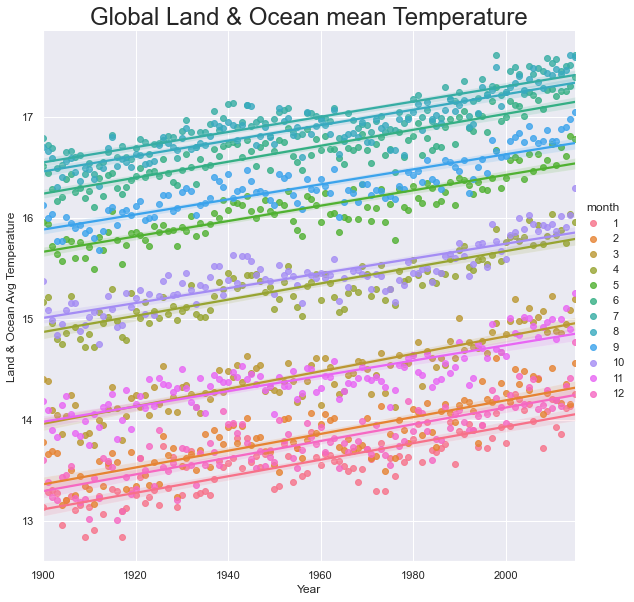

In [2]:
df = pd.read_csv(r"C:\Users\amanta\Documents\ClimateChange\GlobalTemperatures.csv")
#data convert
df['dt'] = pd.to_datetime(df['dt'])
df['dt'].dt.year
df['dt'].dt.month
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df1 = df[['dt','year','month','LandAndOceanAverageTemperature']]
dfGlobal = df1[(df1['year'] >= 1900) & (df1['year'] <= 2020)]

sns.set_theme()

x = dfGlobal['year']
y = dfGlobal['LandAndOceanAverageTemperature']
hue = dfGlobal['month']
dfGlobalgroup = sns.lmplot(
    data=dfGlobal,
    x="year", y="LandAndOceanAverageTemperature", hue="month",
    height=8)

plt.title( "Global Land & Ocean mean Temperature" , size = 24 ) 

# Use more informative axis labels than are provided by default
dfGlobalgroup.set_axis_labels("Year", "Land & Ocean Avg Temperature")
plt.show()

   *There is a positive raise in Temperature during the years from 1900 for every month*

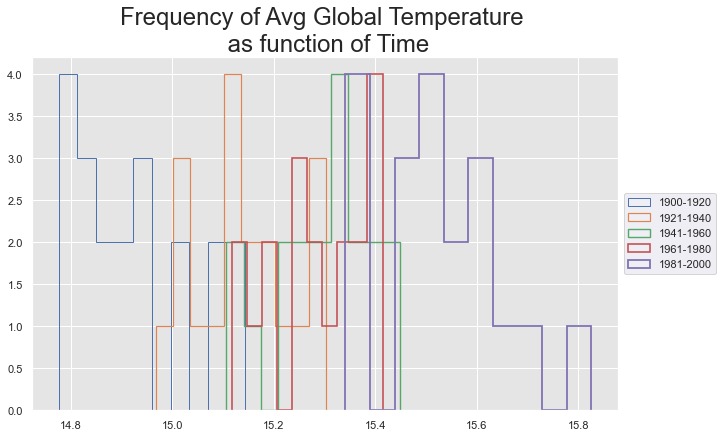

In [3]:
df = pd.read_csv(r"C:\Users\amanta\Documents\ClimateChange\GlobalTemperatures.csv")
#data convert
df['dt'] = pd.to_datetime(df['dt'])
df['dt'].dt.year
df['dt'].dt.month

df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month

df1 = df[['year','month','LandAndOceanAverageTemperature']]

dfGlobal = df1[(df1['year'] >= 1900) ]

dfGroup = dfGlobal.groupby('year').agg(
    {'month':['count'],
        'LandAndOceanAverageTemperature':['mean', 'std']})
       
dfGroup.columns = dfGroup.columns.droplevel(0) 
dfGroup.reset_index(inplace=True)

x = dfGroup['year']
y = dfGroup["mean"]
err = dfGroup["std"]

DeltaT = []
for Ti in y:
    #print (Ti)
    dT = Ti - y[0]
    DeltaT.append(dT)
    
fig2, ax2 = plt.subplots()
fig2.set_size_inches(10.5, 6.5)
ax2.set(facecolor = "grey")
ax2.patch.set_alpha(0.20)


ax2.hist(y[0:20],bins = 10, label = '{:d}-{:d}'.format(x[0], x[20]), histtype='step', stacked=True, fill=False, linewidth=1)
ax2.hist(y[21:40],bins = 10, label = '{:d}-{:d}'.format(x[21], x[40]), histtype='step', stacked=True, fill=False,linewidth=1.2)
ax2.hist(y[41:60],bins = 10, label = '{:d}-{:d}'.format(x[41], x[60]), histtype='step', stacked=True, fill=False,linewidth=1.4)
ax2.hist(y[61:80],bins = 10, label = '{:d}-{:d}'.format(x[61], x[80]), histtype='step', stacked=True, fill=False,linewidth=1.6)
ax2.hist(y[81:100],bins = 10, label = '{:d}-{:d}'.format(x[81], x[100]), histtype='step', stacked=True, fill=False,linewidth=1.8)

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_title('Frequency of Avg Global Temperature \n as function of Time',size = 24)

plt.show()

*The diagram is moving to the right as a conclusion to this the frequncy of higher temperatures is getting higher*

- ##### CO2 PPM - Trends in Atmospheric Carbon Dioxide

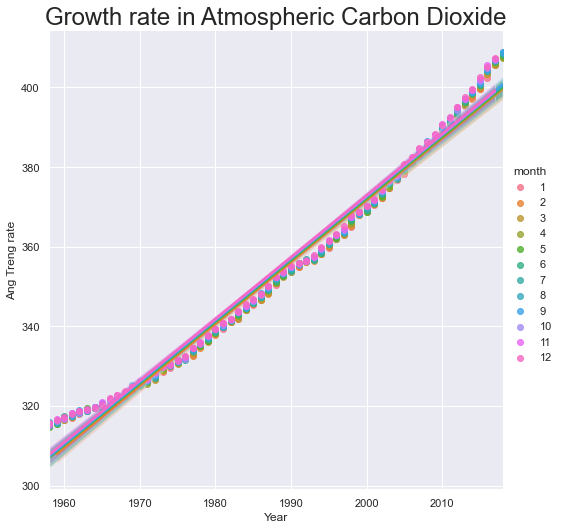

In [4]:
df = pd.read_csv(r"C:\Users\amanta\Documents\ClimateChange\co2_mm_mlo.csv")

#data convert
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dt.year
df['Date'].dt.month

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

df1 = df[['year','month','Trend']]
#keep the beging year and exclude errors = -99.99
dfCo2 = df1[(df1['year'] >= 1900) & (df1['Trend'] >0)]
#groupby selected and mean all the rest
dfCo2group = dfCo2.groupby(['year','month']).mean()
dfCo2group.reset_index(inplace=True)
sns.set_theme()
x = dfCo2group['year']
y = dfCo2group["Trend"]
hue = dfCo2group['month']
# Plot sepal width as a function of sepal_length across days
dfCo2group = sns.lmplot(
    data=dfCo2group,
    x="year", y="Trend", hue="month",
    height=7)
#Use more informative axis labels than are provided by default
dfCo2group.set_axis_labels("Year", "Ang Treng rate")
plt.title( "Growth rate in Atmospheric Carbon Dioxide" , size = 24 ) 
plt.show()


   *There is a positive raise in Co2 Average mlo franction the period from 1900 for every month*

- ##### Global Temperature in colleration with CO2 PPM - Trends in Atmospheric Carbon Dioxide

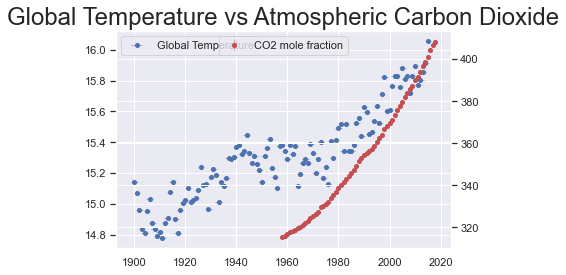

In [5]:
GlobalTemperatures = np.load(r"C:\Users\amanta\Documents\ClimateChange\GlobalTemperatures.npy")
Co2mloFraction = np.load(r"C:\Users\amanta\Documents\ClimateChange\Co2mloFraction.npy")

x = GlobalTemperatures[0]
y = GlobalTemperatures[1]
ygerr = GlobalTemperatures[2]
xco = Co2mloFraction[0]
yco = Co2mloFraction[1]
ycoerr = Co2mloFraction[2]

#https://matplotlib.org/3.1.1/gallery/statistics/errorbar_features.html#sphx-glr-gallery-statistics-errorbar-features-py
lower_error = ygerr
upper_error = ygerr
asymmetric_error = [lower_error, upper_error]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.rcParams['figure.figsize'] = [14,10]
ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o', markersize=4, elinewidth=0.5, capsize=0, label='Global Temperature')
ax2.errorbar(xco, y=yco, yerr=ycoerr, fmt='ro', markersize=4, elinewidth=0.5, capsize=0, label='CO2 mole fraction')
ax1.legend(loc ='upper left')
ax2.legend(loc ='upper center')
plt.title( "Global Temperature vs Atmospheric Carbon Dioxide" , size = 24 )
plt.show()


 *The first Co2 mesurment is from 1958. There is a possitive raise to both Global Temperature amd Co2 mlo fraction*

- ##### Average cumulative mass balance of messured Glacier
    This is cumulative change in mass balance of a set of “reference” glaciers worldwide beginning in 1945</blockquote>

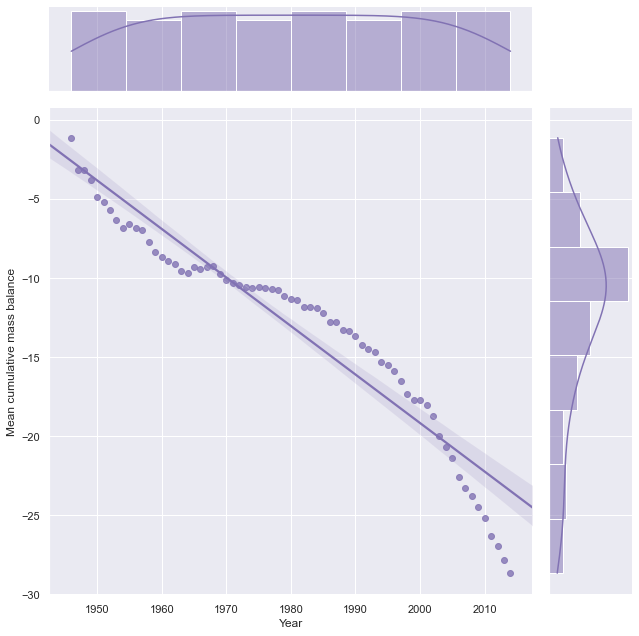

In [6]:
df = pd.read_csv(r"C:\Users\amanta\Documents\ClimateChange\glaciers.csv")
dfGl = df[(df['Year'] > 1945) ]
x = dfGl['Year']
y = dfGl["Mean cumulative mass balance"]

sns.set_theme(style="darkgrid")

g = sns.jointplot(x="Year", y="Mean cumulative mass balance", data=dfGl,
                  kind="reg", truncate=False,
                  #xlim=(0, 60), ylim=(0, 12),
                  color="m", height=9)
plt.show()

 *The mesured Glacier mass is decreasing every year*

- ##### Global Temperature in colleration with Average Glacier mass

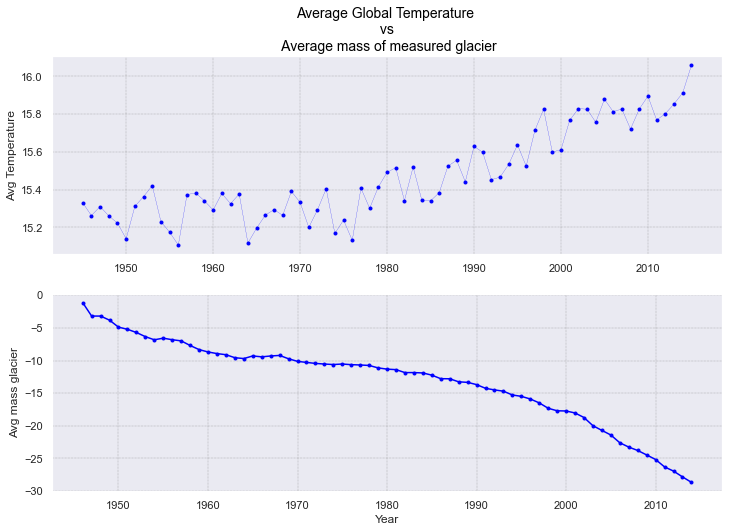

In [7]:
df = pd.read_csv(r"C:\Users\amanta\Documents\ClimateChange\glaciers.csv")
dfGl = df[(df['Year'] > 1945) ]
#Global
df = pd.read_csv(r"C:\Users\amanta\Documents\ClimateChange\GlobalTemperatures.csv")

#data convert
df['dt'] = pd.to_datetime(df['dt'])
df['dt'].dt.year
df['dt'].dt.month
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df1 = df[['year','month','LandAndOceanAverageTemperature']]
dfGlobal = df1[(df1['year'] >= 1945) ]
#getting discription 
dfDescr = dfGlobal.describe()
dfDescr.reset_index(inplace=True)   
#getting the std from average temperature
dfGroup = dfGlobal.groupby('year').agg(
    {'month':['count'],
        'LandAndOceanAverageTemperature':['mean', 'std']})

dfGroup.columns = dfGroup.columns.droplevel(0) 
dfGroup.reset_index(inplace=True)
#Creating the plot

x = dfGl['Year']
y = dfGl['Mean cumulative mass balance']
#ygerr = npyData[2]
xgl = dfGroup['year']
ygl = dfGroup['mean']

#-------------------

plt.rcParams['figure.figsize'] = [12,8]
plt.subplot(2, 1, 1)
plt.plot(xgl, ygl, 'o-', markersize=3, linewidth=0.2,color="blue" )
plt.title('Average Global Temperature \n vs \n Average mass of measured glacier', 
          fontsize=14, 
          color="black")
          
plt.ylabel('Avg Temperature') 
plt.grid(b=True, which='major', color='grey', linestyle='-.', linewidth=0.3)

plt.subplot(2, 1, 2)
plt.plot(x, y, '.-',color="blue")
plt.xlabel('Year')
plt.ylabel('Avg mass glacier')
plt.grid(b=True, which='major',color='grey', linestyle='-.', linewidth=0.3)

plt.show()

 *Global mean Temperarue increases while Glacier decreases*

##### Discussion
-------------------
<blockquote>Αs a conclusion there seems to be a cause-and-effect relationship between these three parameters Global Temperature, Atmosheric Carbon Deoxid and Glaciers mass. Fearther analysis is to be made.</blockquote>

##### Conclusion
-------------------
<blockquote>Based on these conclusions, more focused studies will be carried out in order to find ways to control this phenomenon, as well new ways of approaching industrial development</blockquote>

##### Ρeferences
-------------------

 * <a href = "https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data">
    https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data</a> 
 * <a href = "https://datahub.io/core/glacier-mass-balance#readme">https://datahub.io/core/glacier-mass-balance#readme</a>
 * <a href = "https://datahub.io/core/co2-ppm"> https://datahub.io/core/co2-ppm</a> 

##### Ahnowledgementses
-------------------
<blockqoute>I would like to express my special thanks of gratitude to my friend and teacher (Kalliopi Kanaki) as well as all people and reachers offer their work, Knowlege and data, for us to use. I would also like thank DT company and all the people who offered and worked for this learning journey, giving us the means and the opportunity to extend our horizong.